* Machine Learning Training Data : size stratification
* Data originally pooled from all technologies

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Import Training Data
df_20to49 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train_.csv')
df_50to99 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train_.csv')
df_100to299 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train_.csv')
df_300to399 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train_.csv')
df_400to499 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train_.csv')
df_500to999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train_.csv')
df_1000to5999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train_.csv')
df_6000 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train_.csv')

In [3]:
# Copy Dataframes for later parsing tasks
df_20to49_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train.csv')
df_50to99_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train.csv')
df_100to299_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train.csv')
df_300to399_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train.csv')
df_400to499_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train.csv')
df_500to999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train.csv')
df_1000to5999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train.csv')
df_6000_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train.csv')

In [4]:
df_20to49['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

<a id='imbalance'></a>

<a id='hom_ref'></a>

In [5]:
# Import Test Data
df_20to49_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test_.csv')
df_50to99_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test_.csv')
df_100to299_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test_.csv')
df_300to399_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test_.csv')
df_400to499_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test_.csv')
df_500to999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test_.csv')
df_1000to5999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test_.csv')
df_6000_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test_.csv')

In [6]:
# Import Test Data
df_20to49_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test.csv')
df_50to99_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test.csv')
df_100to299_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test.csv')
df_300to399_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test.csv')
df_400to499_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test.csv')
df_500to999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test.csv')
df_1000to5999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test.csv')
df_6000_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test.csv')

In [7]:
df_20to49_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [8]:
df_20to49_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
# # Store header names in lists and find names that are NOT contained in BOTH lists
# c = list(df_train.columns.values)
# d = list(df_test.columns.values)
# set(d) - set(c)

***
EDA

Size distribution of sampled data set [all size datasets pooled]
***

In [ ]:
# df_train = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/train/random_sample_SizeBins_szwt_train.csv')
# df_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/test/random_sample_SizeBins_szwt_test.csv')

In [ ]:
# df_train['Size'].abs()
# df_test['Size'].abs()
# df_test = df_test[df_test['Size'] >= 20]

# df_train['log_size'] = np.log10(df_train.Size)
# df_test['log_size'] = np.log10(df_test.Size)

In [ ]:
# sns.set_style("white")
# p = df_train['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Training Set')
# # plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_training.png', bbox_inches='tight') 

In [ ]:
# sns.set_style("white")
# p = df_test['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Test Set')
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_test.png', bbox_inches='tight') 

***
**20-49bp**
***

***
Impute missing values using KNN
***

In [9]:
# Store training data in a new variable which will be converted to a matrix
X = df_20to49
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1,987.272727,3.792119,22.0,425.090909,70.233318,22.0,0.0,0.0,884.157895,...,9543.921053,4003.733990,38.0,0,0,0,0.0,79919582,1,1.0
1,1,959.482759,17.889740,29.0,448.413793,79.056731,29.0,0.0,0.0,867.683616,...,17745.000000,0.000000,1.0,0,0,0,0.0,141377919,1,1.0
2,1,980.400000,19.255475,30.0,438.800000,68.328325,30.0,0.0,0.0,896.367470,...,9399.681818,3679.967384,22.0,0,0,0,0.0,86326285,0,0.0


In [10]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/1583 with 2 missing, elapsed time: 2.169
Imputing row 101/1583 with 1 missing, elapsed time: 2.237
Imputing row 201/1583 with 1 missing, elapsed time: 2.253
Imputing row 301/1583 with 2 missing, elapsed time: 2.269
Imputing row 401/1583 with 2 missing, elapsed time: 2.280
Imputing row 501/1583 with 2 missing, elapsed time: 2.299
Imputing row 601/1583 with 2 missing, elapsed time: 2.308
Imputing row 701/1583 with 1 missing, elapsed time: 2.322
Imputing row 801/1583 with 2 missing, elapsed time: 2.336
Imputing row 901/1583 with 1 missing, elapsed time: 2.349
Imputing row 1001/1583 with 2 missing, elapsed time: 2.364
Imputing row 1101/1583 with 1 missing, elapsed time: 2.377
Imputing row 1201/1583 with 2 missing, elapsed time: 2.390
Imputing row 1301/1583 with 1 missing, elapsed time: 2.406
Imputing row 1401/1583 with 57 missing, elapsed time: 2.422
Imputing row 1501/1583 with 58 missing, elapsed time: 2.439


In [11]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
df_20to49_header = list(df_20to49.columns.values)
X.columns = df_20to49_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1.0,987.272727,3.792119,22.0,425.090909,70.233318,22.0,0.0,0.0,884.157895,...,9543.921053,4003.733990,38.0,0.0,0.0,0.0,0.0,79919582.0,1.0,1.0
1,1.0,959.482759,17.889740,29.0,448.413793,79.056731,29.0,0.0,0.0,867.683616,...,17745.000000,0.000000,1.0,0.0,0.0,0.0,0.0,141377919.0,1.0,1.0
2,1.0,980.400000,19.255475,30.0,438.800000,68.328325,30.0,0.0,0.0,896.367470,...,9399.681818,3679.967384,22.0,0.0,0.0,0.0,0.0,86326285.0,0.0,0.0


In [12]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [13]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

1.0    853
2.0    273
0.0    457
dtype: int64

In [14]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [15]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [16]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [ ]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced') 
model.fit(X_train, y_train)

**NOTE :** 

Determined OOB score based on 70% of the training data

In [ ]:
n_estimators = 50
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 

In [ ]:
# df_oob = pd.DataFrame()
# df_oob['trees'] = trees
# df_oob['oob'] = oob

# ax = plt.plot(trees, oob)
# sns.set_style("white")
# plt.xlabel("Number of Trees [n_estimators]")
# plt.ylabel("OOB error rate")
# plt.legend(loc="upper right")
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/20-45bp_OOB.png', bbox_inches='tight')
# # plt.show()

** Train Model Using Optimal Tuning Parameters**

In [17]:
model = RandomForestClassifier(n_estimators=15, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

[Another Resource](https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees)

In [18]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

<a id='100_trees'></a>

In [19]:
# # # %matplotlib inline
# feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
# feature_importances.sort()
# # # plt.figure(figsize=(37, 37))
# # plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/df_20to49_featureImportance.png', bbox_inches='tight')
# # feature_importances.plot(kind="barh", figsize=(8,30))

In [20]:
feature_importances.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/feature_importance.csv')

In [21]:
X_ = X4[['pacbio.alt_reason_alignmentScore','Ill300x.alt_count','pacbio.ref_insertSize_std','pacbio.alt_alnScore_std','pacbio.ref_reason_alignmentScore','Ill250.ref_count','Ill250.alt_alnScore_std','Ill250.ref_reason_alignmentScore','Ill300x.ref_reason_alignmentScore','IllMP.ref_reason_alignmentScore','pacbio.alt_insertSize_std','pacbio.ref_alnScore_mean','Ill300x.ref_count','pacbio.ref_count','Ill300x.alt_insertSize_std','TenX.HP1_alt_alnScore_std','IllMP.ref_insertSize_std','IllMP.ref_count','TenX.HP2_alt_count','Ill250.alt_reason_alignmentScore','Ill250.ref_alnScore_std','Ill250.alt_insertSize_mean','TenX.HP1_alt_insertSize_std','pacbio.alt_count','pacbio.ref_insertSize_mean']]

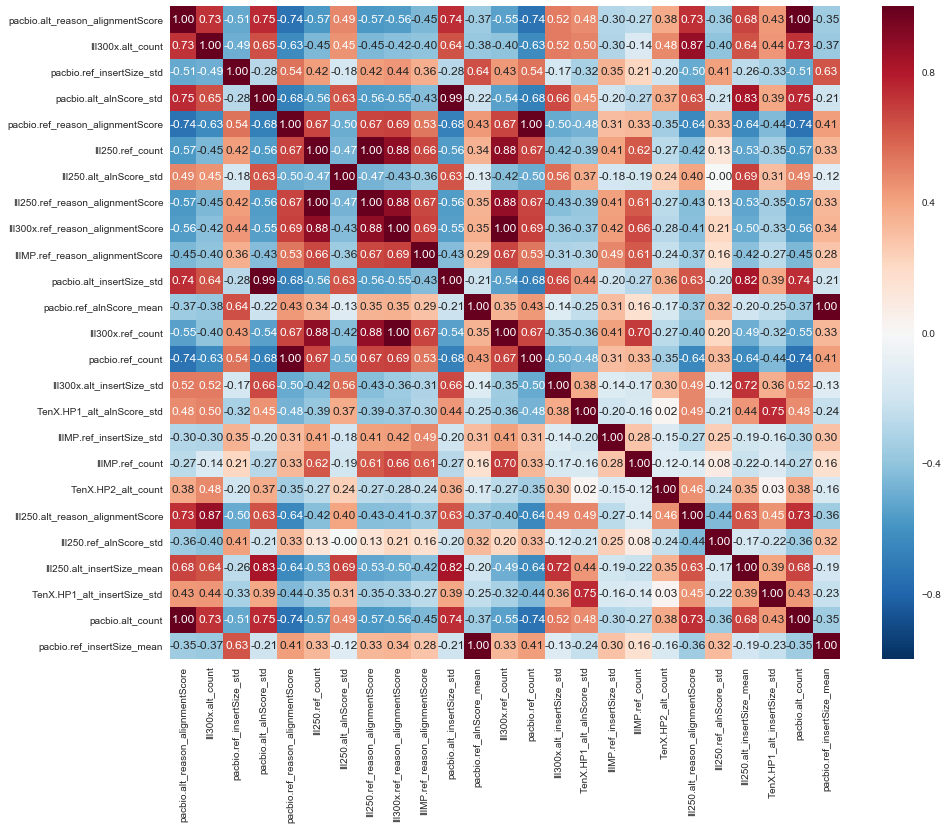

In [22]:
plt.figure(figsize=(15, 12))
sns.heatmap(X_.corr(), annot=True, fmt=".2f")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
# plt.figure(figsize=(18, 18))
plt.show()
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/df_20to49_heatmap.png', bbox_inches='tight')

In [23]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

1.0    587
2.0    191
0.0    330
dtype: int64

<a id='prediction_step'></a>

In [24]:
pred = model.predict(X_test)

<a id='traintest_precision'></a>

In [25]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 

Precision score of the training subset: 0.994


In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Accuracy score of the training subset: 0.994


In [27]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
1572,973.270833,12.689792,48.0,412.000000,73.754096,48.0,0.0,0.0,883.948276,139.169840,...,11103.000000,5652.153881,4.0,0.0,0.0,0.0,0.0,172720019.0,0.0,0.000000
1570,981.473684,17.651207,38.0,422.921053,73.470861,38.0,0.0,0.0,873.902174,153.517317,...,9378.000000,4233.168070,22.0,0.0,0.0,0.0,0.0,172938152.0,0.0,0.000000
1192,952.714286,30.003401,21.0,445.952381,70.458685,21.0,0.0,0.0,901.713513,123.191738,...,10852.897960,3857.826025,49.0,0.0,0.0,0.0,0.0,106231395.0,0.0,0.000000
897,984.833333,12.442088,30.0,400.300000,74.925363,30.0,0.0,0.0,881.010929,142.960386,...,10622.818180,4458.983778,22.0,0.0,0.0,0.0,0.0,116783658.0,1.0,1.000000
320,972.666667,25.581677,30.0,406.933333,64.994837,30.0,0.0,0.0,895.710660,153.398597,...,9728.148148,2935.131352,27.0,0.0,0.0,0.0,0.0,1797162.0,1.0,0.392857


In [28]:
labels = pd.DataFrame(y_test)

In [29]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_20to49['GTcons']
df_Xtest['chrom'] = df_20to49['chrom']
df_Xtest['start'] = df_20to49['start']
df_Xtest['end'] = df_20to49['end']

In [30]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [31]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Homozygous_Variant       82
Homozygous_Reference    127
Heterozygous_Variant    266
dtype: int64

In [32]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Homozygous_Variant       80
Homozygous_Reference    128
Heterozygous_Variant    267
dtype: int64

In [33]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[266   0   0]
 [  1 126   0]
 [  0   2  80]]


In [34]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,266,0,0,266
Homozygous_Reference,1,126,0,127
Homozygous_Variant,0,2,80,82
All,267,128,80,475


<a id='traintest_confusion_matrix'></a>

In [35]:
# # Pandas: save table to HTML
# p = pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)
# p.to_html('cro.html')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00       266
Homozygous_Reference       0.98      0.99      0.99       127
  Homozygous_Variant       1.00      0.98      0.99        82

         avg / total       0.99      0.99      0.99       475



***
Predict
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

In [ ]:
df_20to49_test.drop(['GTcons'],axis=1, inplace=True)

In [ ]:
X2 = df_20to49_test

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_20to49_test_header = list(df_20to49_test.columns.values)
X2.columns = df_20to49_test_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df_20to49_test_['chrom']
X5['GTcons'] = df_20to49_test_['GTcons']
X5['start'] = df_20to49_test_['start']
X5['end'] = df_20to49_test_['end']
X5['Size'] = df_20to49_test_['Size']
X5['GTsupp'] = df_20to49_test_['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/df_20to49.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/df_20to49_log.csv', index=False)

In [37]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/df_20to49.csv')

In [38]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [39]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,GTsupp,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.066667,0.933333,0.000000,1,4,956.666667,34.439964,18.0,408.277778,67.678000,...,3520.607336,17.0,1,0,0,0,0.0,109690878,1,0.400000
1,0.066667,0.800000,0.133333,1,2,907.800000,32.058696,5.0,515.800000,111.528292,...,2980.377554,26.0,1,0,0,0,0.0,5928792,1,0.518519
2,0.000000,1.000000,0.000000,1,3,974.944444,23.945476,18.0,414.055556,82.909906,...,3314.150040,15.0,1,0,0,0,0.0,22352395,1,0.629630


In [40]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/df_20to49_final.csv', index=False)

In [ ]:
# X6['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
# X6['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
# X6['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X7['GTcons'].isnull().sum()

***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [41]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[487   5   0]
 [  9 956   4]
 [  3   7 298]]


In [42]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [43]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.984


In [44]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.984


In [45]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,956,9,4,969
Homozygous_Reference,5,487,0,492
Homozygous_Variant,7,3,298,308
All,968,499,302,1769


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [46]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [47]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,798,0,0,798
Homozygous_Reference,0,450,0,450
Homozygous_Variant,0,0,187,187
All,798,450,187,1435


In [48]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00       798
Homozygous_Reference       1.00      1.00      1.00       450
  Homozygous_Variant       1.00      1.00      1.00       187

         avg / total       1.00      1.00      1.00      1435



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000 - 5999 bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 1000 - 6000+

In [ ]:
df = pd.concat([df_1000to5999, df_1000to5999_test, df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = df
df_ = pd.concat([df_1000to5999_, df_1000to5999_test_, df_6000_, df_6000_test_], axis=0)
df_ = df_.reset_index()

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df_.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df_['chrom']
X5['GTcons'] = df_['GTcons']
X5['start'] = df_['start']
X5['end'] = df_['end']
X5['Size'] = df_['Size']
X5['GTsupp'] = df_['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/df_20to49_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/df_20to49_log._predLrgcsv', index=False)

In [ ]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/df_20to49_predLrg.csv')

In [ ]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [ ]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/df_20to49_final_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [ ]:
X6['predicted_GTcons_label'].dtypes

In [ ]:
X6.GTcons = X6.GTcons.astype(int)

In [ ]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [ ]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

In [ ]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [ ]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

In [ ]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

In [ ]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [ ]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [ ]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 6000+ bp
***

** Load Data **

In [49]:
df = pd.concat([df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_6000, df_6000_test], axis=0)
df2 = df2.reset_index()

In [50]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [51]:
X2 = df

** Impute missing values using KNN **

In [52]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/57 with 2 missing, elapsed time: 0.005


In [53]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,847.122340,126.858192,...,9426.166667,4374.053225,84.0,0.0,0.0,0.0,0.0,42955444.0,15.0,0.051344
1,980.052632,7.085743,38.0,445.684211,91.177128,35.0,3.0,0.0,895.895000,145.307102,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,32680008.0,31.0,0.059607
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,913.195745,119.408418,...,10041.314290,4093.944500,105.0,0.0,0.0,1.0,1.0,90247291.0,13.0,0.023656


In [54]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,847.122340,126.858192,...,9426.166667,4374.053225,84.0,0.0,0.0,0.0,0.0,42955444.0,15.0,0.051344
1,980.052632,7.085743,38.0,445.684211,91.177128,35.0,3.0,0.0,895.895000,145.307102,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,32680008.0,31.0,0.059607
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,913.195745,119.408418,...,10041.314290,4093.944500,105.0,0.0,0.0,1.0,1.0,90247291.0,13.0,0.023656


In [55]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [56]:
pred = model.predict(X5)

In [57]:
pred_prob = model.predict_proba(X5)

In [58]:
pred_prob_log = model.predict_log_proba(X5)

In [59]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [60]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [62]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/20to49/df_20to49_6000_predLrg.csv', index=False)

In [63]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/20to49/df_20to49_6000_predLrg.csv')

In [64]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [65]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [66]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/20to49/20to49_final_6000_predLrg.csv', index=False)

In [67]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [68]:
X6.GTcons = X6.GTcons.astype(int)

In [69]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    27
1    20
2    10
dtype: int64


In [70]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[27  0  0]
 [ 0 20  0]
 [ 0  0 10]]


In [71]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [72]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 1.000


In [73]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 1.000


In [74]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,20,0,0,20
Homozygous_Reference,0,27,0,27
Homozygous_Variant,0,0,10,10
All,20,27,10,57


In [75]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


In [76]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,12,0,0,12
Homozygous_Reference,0,1,0,1
Homozygous_Variant,0,0,4,4
All,12,1,4,17


In [77]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00        12
Homozygous_Reference       1.00      1.00      1.00         1
  Homozygous_Variant       1.00      1.00      1.00         4

         avg / total       1.00      1.00      1.00        17



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000-5999 bp
***

** Load Data **

In [78]:
df = pd.concat([df_1000to5999, df_1000to5999_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_1000to5999_, df_1000to5999_test_], axis=0)
df2 = df2.reset_index()

In [79]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [80]:
X2 = df

** Impute missing values using KNN **

In [81]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/227 with 2 missing, elapsed time: 0.047
Imputing row 101/227 with 2 missing, elapsed time: 0.059
Imputing row 201/227 with 1 missing, elapsed time: 0.066


In [82]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.105991,123.374641,...,9722.50000,4563.149405,58.0,0.0,0.0,0.0,0.0,77339761.0,7.0,0.032313
1,984.259259,11.249996,27.0,411.592593,92.081791,26.0,1.0,0.0,905.625000,148.491683,...,11218.84615,4261.400002,26.0,0.0,0.0,0.0,0.0,138966208.0,3.0,0.057654
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,906.975460,137.825040,...,10145.36000,4282.572030,75.0,0.0,0.0,0.0,0.0,13294465.0,3.0,0.026614


In [83]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.105991,123.374641,...,9722.50000,4563.149405,58.0,0.0,0.0,0.0,0.0,77339761.0,7.0,0.032313
1,984.259259,11.249996,27.0,411.592593,92.081791,26.0,1.0,0.0,905.625000,148.491683,...,11218.84615,4261.400002,26.0,0.0,0.0,0.0,0.0,138966208.0,3.0,0.057654
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,906.975460,137.825040,...,10145.36000,4282.572030,75.0,0.0,0.0,0.0,0.0,13294465.0,3.0,0.026614


In [84]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [85]:
pred = model.predict(X5)

In [86]:
pred_prob = model.predict_proba(X5)

In [87]:
pred_prob_log = model.predict_log_proba(X5)

In [88]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [89]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [90]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/20to49/df_20to49_1000to5999_predLrg.csv', index=False)

In [91]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/20to49/df_20to49_1000to5999_predLrg.csv')

In [92]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [93]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [94]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/20to49/20to49_final_1000to5999_predLrg.csv', index=False)

In [95]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [96]:
X6.GTcons = X6.GTcons.astype(int)

In [97]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    93
1    80
2    54
dtype: int64


In [98]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[41 30 22]
 [30 32 18]
 [20 21 13]]


In [99]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [100]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.379


In [101]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.379


In [102]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,32,30,18,80
Homozygous_Reference,30,41,22,93
Homozygous_Variant,21,20,13,54
All,83,91,53,227


In [103]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


In [104]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,22,15,12,49
Homozygous_Reference,22,17,12,51
Homozygous_Variant,17,12,8,37
All,61,44,32,137


In [105]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.36      0.45      0.40        49
Homozygous_Reference       0.39      0.33      0.36        51
  Homozygous_Variant       0.25      0.22      0.23        37

         avg / total       0.34      0.34      0.34       137

